In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

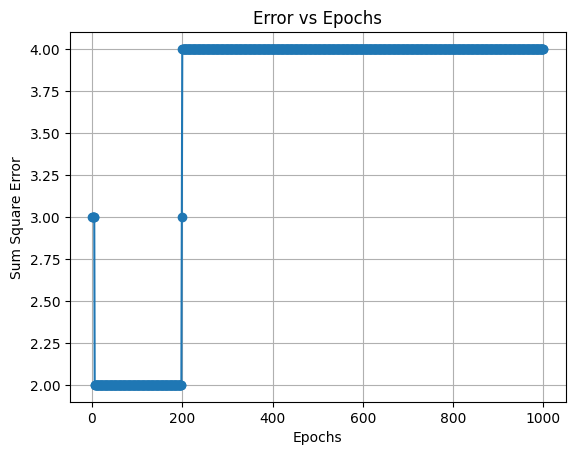

Converged weights: [1.00000000e-01 1.38777878e-17]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and labels
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initialize weights
W = np.array([10, 0.2])  # Adjusted to match the number of features
alpha = 0.05  # Learning rate

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron learning algorithm
def perceptron_learning(X, y, W, alpha, max_epochs=1000, convergence_threshold=0.002):
    errors = []
    converged = False
    epochs = 0
    
    while not converged and epochs < max_epochs:
        total_error = 0
        for i in range(len(X)):
            prediction = step_function(np.dot(X[i], W))
            error = y[i] - prediction
            total_error += error**2
            W += alpha * error * X[i]
        errors.append(total_error)
        epochs += 1
        if total_error <= convergence_threshold:
            converged = True
    
    return W, errors

# Train perceptron
final_weights, error_history = perceptron_learning(X, y, W, alpha)

# Plot error vs epochs
plt.plot(range(1, len(error_history) + 1), error_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error vs Epochs')
plt.grid(True)
plt.show()

print("Converged weights:", final_weights)


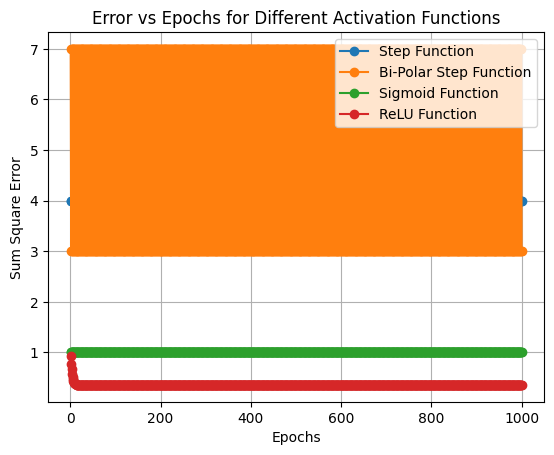

Converged weights (Step Function): [0.34482759 0.34482759]
Converged weights (Bi-Polar Step Function): [0.34482759 0.34482759]
Converged weights (Sigmoid Function): [0.34482759 0.34482759]
Converged weights (ReLU Function): [0.34482759 0.34482759]


In [15]:
# For Bi-Polar Step function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# For Sigmoid function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# For ReLU function
def relu_function(x):
    return np.maximum(0, x)

# Modify perceptron_learning function to accept different activation functions
def perceptron_learning(X, y, W, alpha, activation_function, max_epochs=1000, convergence_threshold=0.002):
    errors = []
    converged = False
    epochs = 0
    
    while not converged and epochs < max_epochs:
        total_error = 0
        for i in range(len(X)):
            prediction = activation_function(np.dot(X[i], W))
            error = y[i] - prediction
            total_error += error**2
            W += alpha * error * X[i]
        errors.append(total_error)
        epochs += 1
        if total_error <= convergence_threshold:
            converged = True
    
    return W, errors

# Train perceptron with different activation functions
final_weights_step, error_history_step = perceptron_learning(X, y, W, alpha, step_function)
final_weights_bipolar, error_history_bipolar = perceptron_learning(X, y, W, alpha, bipolar_step_function)
final_weights_sigmoid, error_history_sigmoid = perceptron_learning(X, y, W, alpha, sigmoid_function)
final_weights_relu, error_history_relu = perceptron_learning(X, y, W, alpha, relu_function)

# Plot error vs epochs for each activation function
plt.plot(range(1, len(error_history_step) + 1), error_history_step, label='Step Function', marker='o')
plt.plot(range(1, len(error_history_bipolar) + 1), error_history_bipolar, label='Bi-Polar Step Function', marker='o')
plt.plot(range(1, len(error_history_sigmoid) + 1), error_history_sigmoid, label='Sigmoid Function', marker='o')
plt.plot(range(1, len(error_history_relu) + 1), error_history_relu, label='ReLU Function', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error vs Epochs for Different Activation Functions')
plt.grid(True)
plt.legend()
plt.show()

print("Converged weights (Step Function):", final_weights_step)
print("Converged weights (Bi-Polar Step Function):", final_weights_bipolar)
print("Converged weights (Sigmoid Function):", final_weights_sigmoid)
print("Converged weights (ReLU Function):", final_weights_relu)


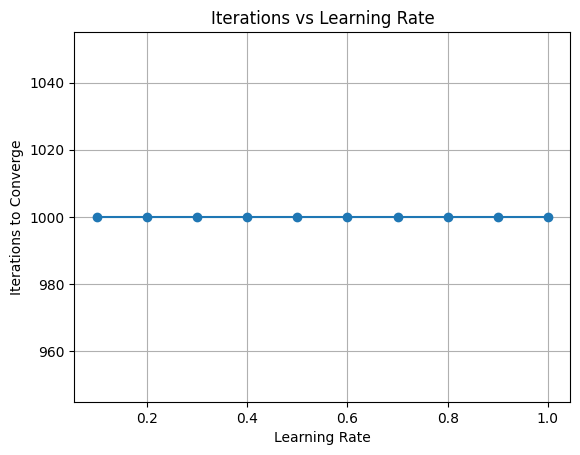

In [16]:
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = []

for lr in learning_rates:
    final_weights, _ = perceptron_learning(X, y, W, lr, step_function)
    iterations.append(len(_))

plt.plot(learning_rates, iterations, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Iterations vs Learning Rate')
plt.grid(True)
plt.show()


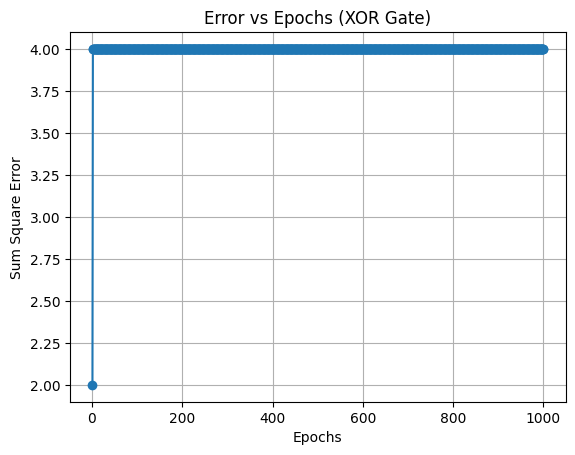

Converged weights for XOR gate: [-0.00517241 -0.00517241]


In [17]:
# XOR gate inputs and labels
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Train perceptron for XOR gate
final_weights_xor, error_history_xor = perceptron_learning(X_xor, y_xor, W, alpha, step_function)

plt.plot(range(1, len(error_history_xor) + 1), error_history_xor, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error vs Epochs (XOR Gate)')
plt.grid(True)
plt.show()

print("Converged weights for XOR gate:", final_weights_xor)


C:\Users\BHOGA SAI VIVEK\AppData\Local\Temp\ipykernel_1792\196016937.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


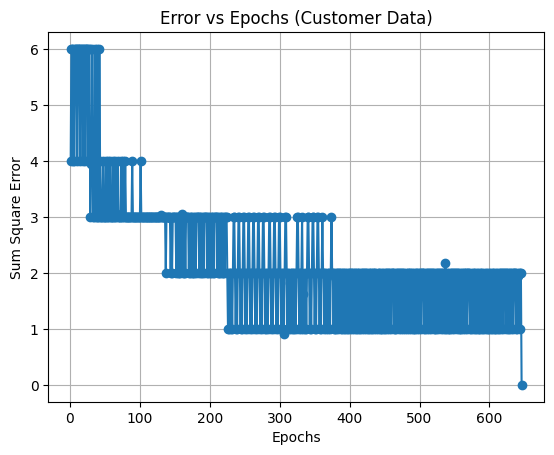

Converged weights for Customer Data: [ -20.76584625 -283.11066888   45.68252775 -120.51466263   24.71198782]


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Customer data
X_customer = np.array([[20, 6, 2 , 386] , [16, 3, 6, 289] , [27, 6, 2, 393] , [19, 1, 2, 110] , [24, 4, 2, 280] , [22, 1, 5, 167] , [15, 4, 2, 271] , [18, 4, 2, 274] , [21, 1, 4, 148] , [16, 2, 4, 198]])
y_customer = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # 1 for high value, 0 for low value

# Initialize weights
W = np.random.rand(X_customer.shape[1] + 1)  # +1 for bias term
alpha = 0.05  # Learning rate

# Sigmoid activation function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Modify perceptron_learning function to accept different activation functions
def perceptron_learning(X, y, W, alpha, activation_function, max_epochs=1000, convergence_threshold=0.002):
    errors = []
    converged = False
    epochs = 0
    
    while not converged and epochs < max_epochs:
        total_error = 0
        for i in range(len(X)):
            prediction = activation_function(np.dot(np.hstack((1, X[i])), W))  # Adding bias term
            error = y[i] - prediction
            total_error += error**2
            W += alpha * error * np.hstack((1, X[i]))  # Adding bias term
        errors.append(total_error)
        epochs += 1
        if total_error <= convergence_threshold:
            converged = True
    
    return W, errors

# Train perceptron for customer data with sigmoid function
final_weights_customer, error_history_customer = perceptron_learning(X_customer, y_customer, W, alpha, sigmoid_function)

# Plot error vs epochs
plt.plot(range(1, len(error_history_customer) + 1), error_history_customer, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Error vs Epochs (Customer Data)')
plt.grid(True)
plt.show()

print("Converged weights for Customer Data:", final_weights_customer)


In [19]:
# Using pseudo-inverse
X_pseudo_inverse = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding bias term
weights_pseudo_inverse = np.linalg.pinv(X_pseudo_inverse) @ y  # Pseudo-inverse formula
print("Converged weights using pseudo-inverse:", weights_pseudo_inverse)


Converged weights using pseudo-inverse: [-0.25  0.5   0.5 ]


In [20]:
from sklearn.neural_network import MLPClassifier

# Creating MLP classifier with sigmoid activation and learning rate 0.05
mlp = MLPClassifier(hidden_layer_sizes=(), activation='logistic', learning_rate_init=0.05, max_iter=1000, tol=0.002)
mlp.fit(X, y)

print("Converged weights for AND gate using MLPClassifier:", mlp.coefs_)


Converged weights for AND gate using MLPClassifier: [array([[2.28939898],
       [2.38669634]])]


In [21]:
import numpy as np

# Define input features (X_xor) and target labels (y_xor) for XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features for XOR gate
y_xor = np.array([0, 1, 1, 0])  # Target labels for XOR gate
from sklearn.neural_network import MLPClassifier

# Creating MLP classifier for XOR gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(), activation='logistic', learning_rate_init=0.05, max_iter=1000, tol=0.002)
mlp_xor.fit(X_xor, y_xor)

print("Converged weights for XOR gate using MLPClassifier:", mlp_xor.coefs_)


Converged weights for XOR gate using MLPClassifier: [array([[0.32013429],
       [0.16731424]])]


In [22]:
# Define new labels for two output nodes
y_two_output = np.array([[1, 0] if val == 0 else [0, 1] for val in y])

# Create MLP classifier for AND gate with two output nodes
mlp_two_output = MLPClassifier(hidden_layer_sizes=(), activation='logistic', learning_rate_init=0.05, max_iter=1000, tol=0.002)
mlp_two_output.fit(X, y_two_output)

print("Converged weights for AND gate with two output nodes using MLPClassifier:", mlp_two_output.coefs_)


Converged weights for AND gate with two output nodes using MLPClassifier: [array([[-3.34245677,  3.12940533],
       [-3.49309704,  3.25405392]])]


In [23]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features for XOR gate
y_xor = np.array([0, 1, 1, 0])  # Target labels for XOR gate
# Create MLP classifier for AND gate
mlp_and = MLPClassifier(hidden_layer_sizes=(), activation='logistic', learning_rate_init=0.05, max_iter=1000, tol=0.002)
mlp_and.fit(X, y)

# Create MLP classifier for XOR gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(), activation='logistic', learning_rate_init=0.05, max_iter=1000, tol=0.002)
mlp_xor.fit(X_xor, y_xor)

print("Converged weights for AND gate using MLPClassifier:", mlp_and.coefs_)
print("Converged weights for XOR gate using MLPClassifier:", mlp_xor.coefs_)


Converged weights for AND gate using MLPClassifier: [array([[2.19345198],
       [2.1823191 ]])]
Converged weights for XOR gate using MLPClassifier: [array([[ 0.43418402],
       [-0.05336437]])]


In [24]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

# Read the CSV file
data = pd.read_csv("D:\WORK\ML\A4\customer_churn.csv")

# Check if the required columns are present
if 'Balance' not in data.columns or 'CreditScore' not in data.columns:
    print("Error: 'Balance' or 'CreditScore' columns not found in the dataset.")
    exit()

# Drop rows with missing values
data.dropna(inplace=True)

# Check the first few rows of the DataFrame
print(data.head())

# Encode target variable based on price movement
data['Target'] = np.where(data['Balance'] > data['CreditScore'], 1, 0)

# Define features and target variable
X_project = data[['CreditScore']]
y_project = data[['Target']]

# Initialize MLPClassifier
mlp_project = MLPClassifier(hidden_layer_sizes=(), activation='logistic', learning_rate_init=0.05, max_iter=1000, tol=0.002)

# Train the classifier
mlp_project.fit(X_project, y_project)

# Print the converged weights for the project dataset
print("Converged weights for project dataset using MLPClassifier:", mlp_project.coefs_)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

c:\Users\BHOGA SAI VIVEK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
